In [6]:
import numpy as np
import matplotlib.pyplot as plt
from housing_1 import X_train, t_train, X_test, t_test
import linreg 


In [7]:
class WeightedLinearRegression():
    """
    Non-Linear regression implementation.
    """

    def __init__(self):
        
        pass
            
    def fit(self, X, t):
        """
        Fits the non-linear regression model.

        Parameters
        ----------
        X : Data matrix array of shape [n_features, 1]
        t : Target vector array of shape [n_features, 1]
        """       
        # reshape both arrays to make sure that we deal with 
        # N-dimensional Numpy arrays
        X=np.array(X).reshape((len(X), -1))
        t= np.array(t).reshape((len(t), 1)) 

        # prepend a column of ones
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)      

        # generate weight-points for the weighted average loss
        weight = (t**2)
        # create a diagonal matrix that contains weights on the diagonal
        A =np.diagflat(weight)
    
        
        # compute optimal coefficients for the weighted average loss model
        self.w = np.linalg.solve(np.dot(X.T, np.dot(A, X)),np.dot(X.T, np.dot(A, t)))
        return self

    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of shape [n_samples, 1]
        """                     
        X=np.array(X).reshape((len(X), -1))
       
        # prepend a column of ones
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)  

        predicted_feature = np.dot(X,self.w)
        return predicted_feature 

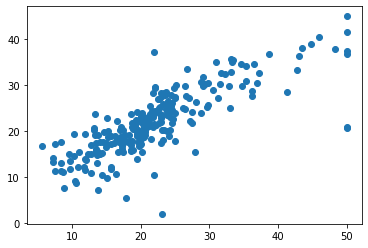

In [8]:
# (Assignment 1) fit linear regression model using all features
model_all = linreg.LinearRegression()
model_all.fit(X_train[:,: -1], t_train)

model_predicton_all = model_all.predict(X_train[:,:-1])
plt.scatter (t_train, model_predicton_all)
plt.show()

In [9]:
# (1b) fit weighted linear regression model using all features
model_all = WeightedLinearRegression()
model_all.fit(X_train[:,: -1], t_train)

#optimal coefficients for the model based on all features
print("Weighted model coefficients (all features):\n", model_all.w)  


Weighted model coefficients (all features):
 [[-5.49242671e-01]
 [ 1.22800124e-01]
 [ 1.40112214e-02]
 [-4.72674829e-02]
 [ 5.18852684e+00]
 [-2.21200297e+01]
 [ 8.25235071e+00]
 [-2.92014525e-02]
 [-1.67834747e+00]
 [ 4.76917254e-01]
 [-1.08859287e-02]
 [-8.45305597e-01]
 [ 2.68081116e-02]]


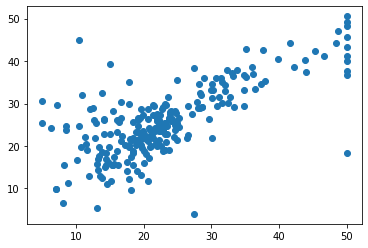

In [10]:
# (1b) evaluation of results
model_predict_all = model_all.predict(X_test[:,:-1])
plt.scatter (t_test, model_predict_all)
plt.show()